# GMM and LDA

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



 ## Outline
    Load Wine data
    Implement a Gaussian Mixture Model Classifier on this data
    Visualize the GMM for features 
    Perform Fisher Linear Discriminant Analysis
    Visualize the LDA for features

In [2]:
# !gdown --id 1WA0I2LdXT_v0GqyYQ6b92ad7cHm_fmUT

In [3]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']

In [4]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
labels-=1 # changing the labels from {1,2,3} to {0,1,2}
del data['class']

In [6]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

**GuassianMixture**: Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution. 

doc: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

`sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', means_init=None, max_iter=100, random_state=None)` 

*  *n_components*: int,default=1 \
The number of mixture components.

*  *covariance_type*: {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’ \
String describing the type of covariance parameters to use. Must be one of: 

    ‘full’: each component has its own general covariance matrix. 
    $$\Sigma_1 \neq \Sigma_2$$
    ‘tied’: all components share the same general covariance matrix. (Common Covariance)
    $$ \Sigma_1 = \Sigma_2 = \Sigma$$
    ‘diag’: each component has its own diagonal covariance matrix. 
    $$ \Sigma_1 = diag(\sigma^2_1,....,\sigma^2_p)
    ; \Sigma_2 = diag(\sigma^2_1,....,\sigma^2_p) $$ 
    ‘spherical’: each component has its own single variance.
    $$\Sigma = diag(\sigma^2_1,....,\sigma^2_p)$$

    *  *max_iter*: int, default=100 \
The number of EM iterations to perform.

*  means_init: array-like of shape (n_components, n_features), default=None \
The user-provided initial means, If it is None, means are initialized using the init_params method.

* *random_state*: int, RandomState instance or None, default=None
Controls the random seed given to the method chosen to initialize the parameters. In addition, it controls the generation of random samples from the fitted distribution. Pass an int for reproducible output across multiple function calls.


In [22]:
# Model
clf = GaussianMixture(n_components=3, covariance_type='tied')  

clf.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

In [25]:
X_train[y_train == 0].mean(axis=0)

Alcohol    13.800238
Hue         1.082619
dtype: float64

In [8]:
# fit
clf.fit(X_train, y_train)

# predict
pred_train = clf.predict(X_train)
pred = clf.predict(X_test)

In [9]:
#evaluate
print ('Train accuracy = ' + str(accuracy_score(y_train, pred_train)))
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Train accuracy = 0.823943661971831
Test accuracy = 0.7777777777777778


In [10]:
# Visualize (Thanks Ron Weiss for this code.)

colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
            
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

The `covariance_type` hyperparameter regulates the degrees of freedom in the shape of each cluster; it is important to configure this properly for any given task.

* The default is `covariance_type="diag"`, which means that the size of the cluster can be chosen individually along each dimension, with the resulting ellipse restricted to align with the axes.

* `covariance_type="spherical"` is a little simpler and faster model that constrains the shape of the cluster so that all dimensions are equal.

* Using `covariance type="full"` enables each cluster to be modeled as an ellipse with arbitrary orientation, which makes the model more complex and computationally expensive (especially as the number of dimensions grows).


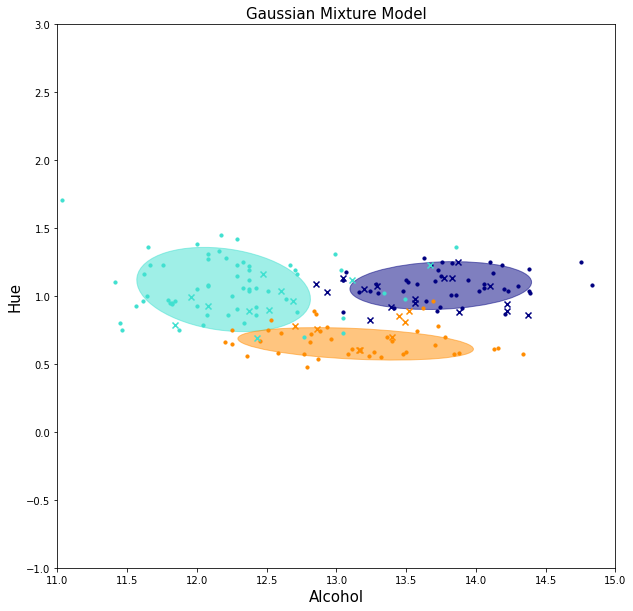

[[[ 0.21193334  0.00804302]
  [ 0.00804302  0.01549938]]

 [[ 0.19364771 -0.02156942]
  [-0.02156942  0.04801611]]

 [[ 0.35643077 -0.01636263]
  [-0.01636263  0.00713873]]]


In [11]:
# Model
estimator = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(10,10))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

plt.show()

print (estimator.covariances_)
# ‘full’: each component has its own general covariance matrix.

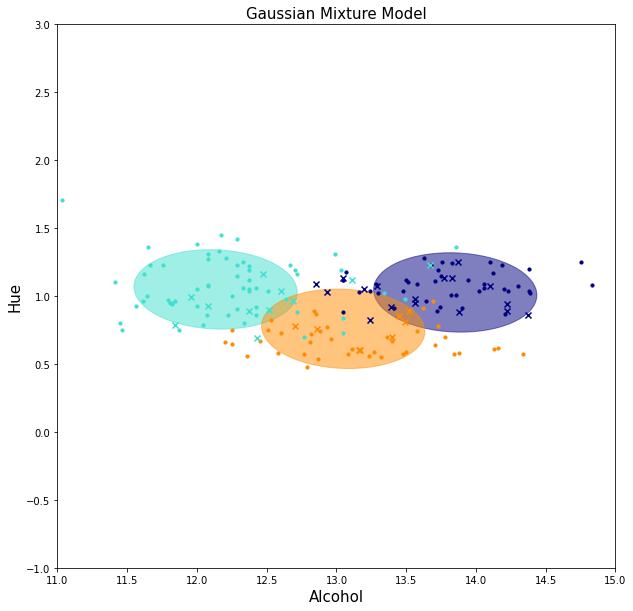

[[ 0.17118458 -0.00579269]
 [-0.00579269  0.0426741 ]]


In [12]:
# Model
estimator = GaussianMixture(n_components=3, covariance_type='tied', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(10,10))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

plt.show()

print (estimator.covariances_)
# ‘tied’: all components share the same general covariance matrix.

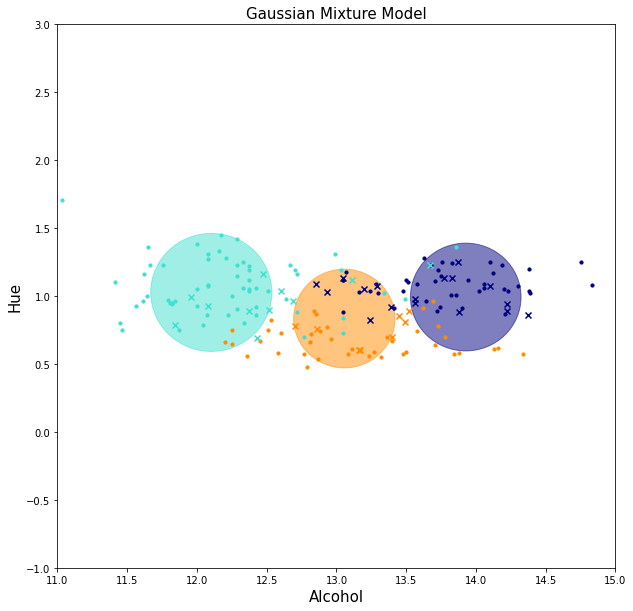

[0.07863619 0.09428019 0.06594552]


In [13]:
# Model
estimator = GaussianMixture(n_components=3, covariance_type='spherical', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(10,10))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

plt.show()

print (estimator.covariances_)
#‘spherical’: each component has its own single variance.

## Guassian Mixture Model Classifier

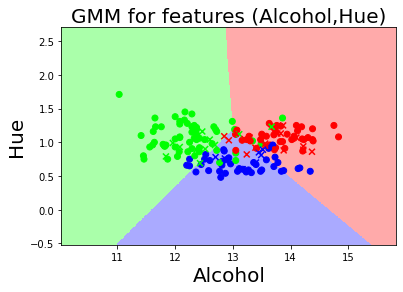

In [14]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Guassian Mixture model training
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

clf = GaussianMixture(n_components=3, covariance_type='tied', max_iter=20, random_state=0)

clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("GMM for features (Alcohol,Hue)", fontsize=20)


plt.show()

# Fisher Discriminant Analysis 

**LinearDiscriminantAnalysis**

doc: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(X_train, y_train, )
# Test
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# print the accuracy
print ('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Training accuracy = 1.0
Test accuracy = 0.9444444444444444


In [16]:
# Weight vector
clf.coef_

array([[ 3.46423061e+00, -5.53514236e-01,  4.06791897e+00,
        -8.37932651e-01,  7.22334160e-03, -2.02884437e+00,
         5.56766611e+00,  1.08117032e+00, -1.23185391e+00,
        -1.17422137e+00, -1.61517893e+00,  3.56601382e+00,
         1.81106026e-02],
       [-1.80191142e+00, -6.30080891e-01, -4.77893044e+00,
         2.98979233e-01,  8.95227517e-03, -3.99909545e-01,
         1.65805074e+00,  4.15027563e+00,  5.96339693e-01,
        -7.27551511e-01,  3.51351648e+00, -1.28752249e-01,
        -7.02187498e-03],
       [-9.34575015e-01,  1.52631128e+00,  2.89708074e+00,
         4.31360434e-01, -2.10129214e-02,  2.73015091e+00,
        -8.33312553e+00, -7.36064228e+00,  3.98937069e-01,
         2.32425971e+00, -3.57433683e+00, -3.55118614e+00,
        -8.48332026e-03]])

In [17]:
clf = LinearDiscriminantAnalysis(n_components=2)
X_transform = clf.fit(X_train, y_train).transform(X_train)
X_test_transform = clf.transform(X_test)

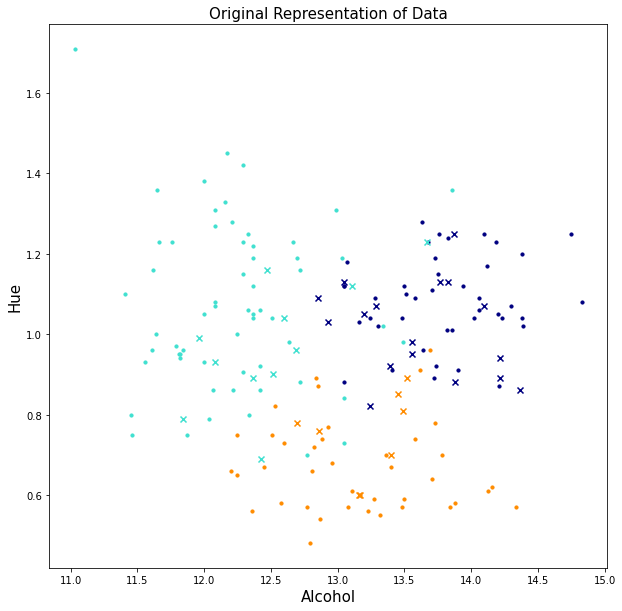

In [18]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[(y_train == n).values]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)


    
# plt.xticks(())
# plt.yticks(())
plt.title('Original Representation of Data', fontsize=15)

plt.show()

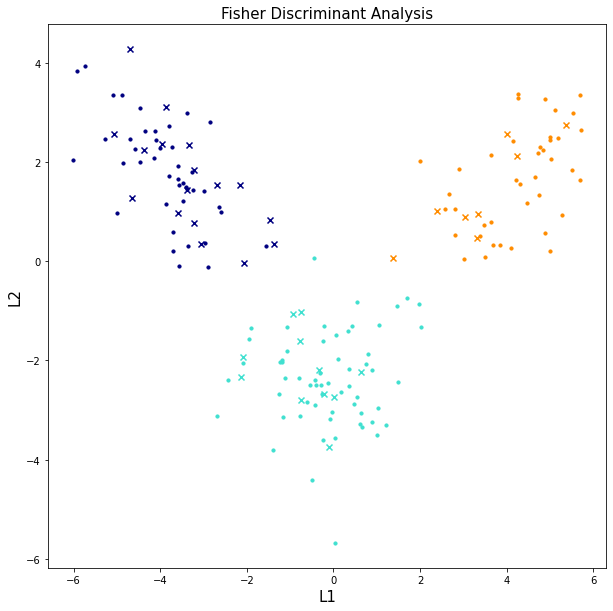

In [19]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('L1', fontsize=15)
plt.ylabel('L2', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_transform[(y_train == n).values]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test_transform[(y_test == n).values]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)

    
# plt.xticks(())
# plt.yticks(())
plt.title('Fisher Discriminant Analysis', fontsize=15)

plt.show()

Test accuracy = 0.7777777777777778


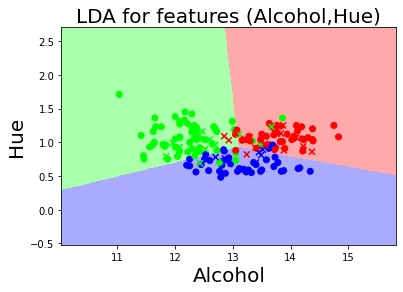

In [20]:
# Only 2 features and decision boundaries.

from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

clf = LinearDiscriminantAnalysis() 
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("LDA for features (Alcohol,Hue)", fontsize=20)


plt.show()

In [21]:
clf.coef_

array([[  3.1572291 ,   4.95655886],
       [ -2.629454  ,   4.17246078],
       [  0.62909045, -11.46307798]])